##  Trigonometric Fourier series examples

**Example:** Find the compact trigonometric Fourier series for the exponential $e^{\tfrac{-t}{2}}$ over the interval $0 \leq t \leq \pi$

**Solution**

The fundamental frequency is $\omega_0=\frac{2\pi}{T_0}=\frac{2\pi}{\pi}=2$ rad/sec.
$$g(t)\,=\,a_0\,+\,\sum_{n=1}^{\infty}\,a_n\,cos\,2nt\,+\,b_n\,sin\,2nt\;\;\;0\leq t\leq \pi$$
$$a_0\:=\:\frac{1}{\pi}\:\int_{0}^{\pi}\:e^{\frac{-t}{2}}\:dt\:=\:0.504$$
$$a_n\:=\:\frac{1}{\pi}\:\int_{0}^{\pi}\:e^{\frac{-t}{2}}\:\cos\,2nt\:dt\:=\:0.504\,\frac{2}{1+16n^2}$$
$$b_n\:=\:\frac{1}{\pi}\:\int_{0}^{\pi}\:e^{\frac{-t}{2}}\:\sin\,2nt\:dt\:=\:0.504\,\frac{8n}{1+16n^2}$$
$$g(t)\:=\:0.504\:[1\:+\:\sum_{n=1}^{\infty}\:\frac{2}{1+16n^2}\:(\cos 2nt+\:4n\,\sin 2nt)] \:\:\:, 0 \leq t \leq \pi$$

For the compact Fourier series:
$$C_0\,=\,a_0=\,0.504$$
$$C_n\,=\,\sqrt{a_{n}^{2}+b_{n}^{2}}\,=\,0.504\,\sqrt{\frac{4}{(1+16n^2)^2}\frac{64n^2}{(1+16n^2)^2}}\,=\,0.504\,(\frac{2}{\sqrt{1+16n^2}})$$
$$\theta _n=\tan ^{-1}(\frac{-b_n}{a_n})=tan ^{-1}(-4n)=-tan ^{-1}(4n) $$

$$g(t)= 0.504+0.244\,\cos(2t-75.96^o)+0.125\,\cos(4t-82.42^o)\,+\,...\;\;\;,0\,\leq t\,\leq \pi$$


### Symbolic solution

Using symbolic toolbox / package, you can find Fourier series coefficients

In [2]:
pkg load symbolic  % this loads symbolic package into octave
syms x n L k       % x, n, L and k are the symbolic variables 

evalin(symengine,'assume(n,Type::Integer)');

a  = @(f,x,n,L) int(f*cos(n*2*pi*x/L)/L*2,x,0,L); 

b  = @(f,x,n,L) int(f*sin(n*2*pi*x/L)/L*2,x,0,L);

fs = @(f,x,k,L) a(f,x,0,L)/2 + symsum(a(f,x,n,L)*cos(n*2*pi*x/L) + b(f,x,n,L)*sin(n*2*pi*x/L),n,1,k);

f = exp(-x/2)

pretty(fs(f,x,2,pi))


error: 'symengine' undefined near line 1 column 8
f = (sym)

   -x 
   ───
    2 
  ℯ   

  ⎛      -π        ⎞            ⎛      -π        ⎞            ⎛     -π        ⎞ 
  ⎜      ───       ⎟            ⎜      ───       ⎟            ⎜     ───       ⎟ 
  ⎜       2        ⎟            ⎜       2        ⎟            ⎜      2        ⎟ 
  ⎜  16⋅ℯ       16 ⎟            ⎜  32⋅ℯ       32 ⎟            ⎜  4⋅ℯ       4  ⎟ 
  ⎜- ─────── + ────⎟⋅sin(2⋅x) + ⎜- ─────── + ────⎟⋅sin(4⋅x) + ⎜- ────── + ────⎟⋅
  ⎝    17⋅π    17⋅π⎠            ⎝    65⋅π    65⋅π⎠            ⎝   17⋅π    17⋅π⎠ 
  
             ⎛     -π        ⎞               -π     
             ⎜     ───       ⎟               ───    
             ⎜      2        ⎟                2     
             ⎜  4⋅ℯ       4  ⎟            2⋅ℯ      2
  cos(2⋅x) + ⎜- ────── + ────⎟⋅cos(4⋅x) - ────── + ─
             ⎝   65⋅π    65⋅π⎠              π      π


### FFT solution
Using ```fft ``` command,  Fourier sereis can be determined as follows

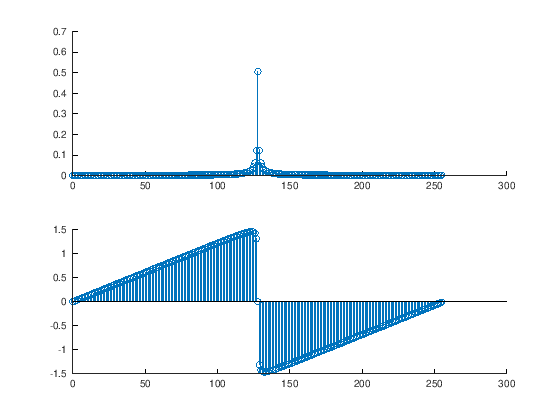

In [10]:
% (c21.m)
% M is the number of coefficients to be computed
T0 = pi; N0 = 256; Ts = T0/N0; M = 10;
t = 0:Ts:Ts*(N0-1); 
t = t';
g = exp(-t/2);

% fft(g) is the FFT
Dn = fft(g)/N0;
[Dnangle, Dnmag] = cart2pol(real(Dn), imag(Dn));
k = 0:length(Dn)-1; 
k = k';
subplot(211), stem(k,fftshift(Dnmag))
subplot(212), stem(k,fftshift(Dnangle))


Amplitudes Angles
ans =

    0.50583    0.00000
    0.24537  -75.26135
    0.12549  -81.47017
    0.08403  -83.12914
    0.06313  -83.61404
    0.05055  -83.62557
    0.04215  -83.39962
    0.03615  -83.03775
    0.03165  -82.59085
    0.02815  -82.08721



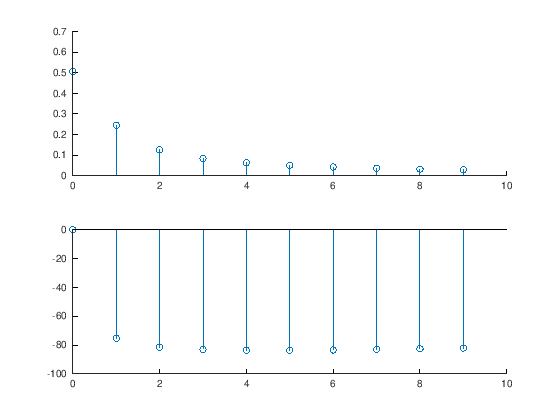

In [11]:
C0 = Dnmag(1);
Cn = 2 * Dnmag(2:M);
Amplitudes = [C0; Cn];
Angles = Dnangle(1:M) * (180/pi);
disp('Amplitudes Angles')
[Amplitudes Angles]

% To plot the Fourier coefficients
k = 0 : length(Amplitudes)-1;
k = k';
subplot(211), stem(k,Amplitudes)
subplot(212), stem(k,Angles)

### Fourier Synthesis
Fourier synthesis is the opearion of rebuilding a signal from its harmonics.

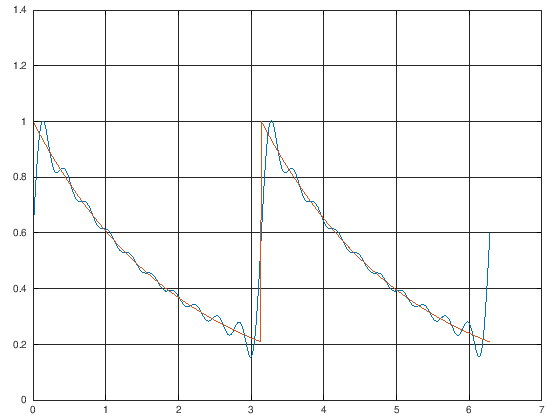

In [25]:
% This program synthesizes Fourier series to yield the original function
T0      = pi;             % periodic time
w0      = 2;              % 
t       = 0:T0/256:2*T0;  % create a time vector of two cycles length
i       = 10;             % number of iterations (harmonics)
c0      = 0.504;          
cn_sum  = 0;               

for n = 1:i
    cn     = 0.504*(2 / sqrt(1 + 16*n^2)) * cos(2*n.*t - atan(4*n) );
    cn_sum = cn_sum + cn; 
end

g = c0 + cn_sum;       % synthesized signal
f = [exp(-t(1:end/2)/2) exp(-t(1:end/2+1)/2)]; % Original function with two cycles

% figure
plot(t,g); grid on; 
hold on;
plot(t,f);
hold off